In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [82]:
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [83]:
df.duplicated().sum()

0

In [84]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [85]:

#Checking CoRelation  using Pearson
df.corr()

print(df[df.corr()>80].sum()) # No High Correlation Found between Features




animal name      0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: object


In [86]:
#Checking CoRelation  using Spearman Rank 
df.corr(method ='spearman')

print(df[df.corr()>80].sum()) # No correation Found

animal name      0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: object


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [88]:
df.shape

(101, 18)

In [89]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [93]:
df=df.drop(columns=["animal name"])

In [94]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [95]:
#Dividing Features In X(variables) and Y(Target)
x=df.iloc[:,:-1]
y=df['type']

In [98]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((70, 16), (31, 16), (70,), (31,))

In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred =knn.predict(xtest)

In [100]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

accuracy_score(ytest,ypred)

0.8709677419354839

In [101]:
confusion_matrix(ytest,ypred)

array([[14,  0,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]], dtype=int64)

In [102]:
recall_score(ytest,ypred,average='macro')

0.7285714285714286

In [103]:
precision_score(ytest,ypred,average='macro')

0.7619047619047619

In [104]:
f1_score(ytest,ypred,average='macro')

0.7154202119719361

In [105]:
# Selecting optimal value using grid search cv

from sklearn.model_selection import GridSearchCV


n_neighbors = np.array(range(1,1000))
param_grid = dict(n_neighbors=n_neighbors)

In [106]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid)
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  9...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979,

In [107]:
print(grid.best_score_)
print(grid.best_params_)

0.9714285714285715
{'n_neighbors': 1}


In [129]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
ypred =knn.predict(xtest)

In [130]:
accuracy_score(ytest,ypred)

1.0

In [131]:
recall_score(ytest,ypred,average='macro')

1.0

In [132]:
f1_score(ytest,ypred,average='macro')

1.0

In [134]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        15\n           2       1.00      1.00      1.00         3\n           3       1.00      1.00      1.00         1\n           4       1.00      1.00      1.00         2\n           5       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         5\n           7       1.00      1.00      1.00         3\n\n    accuracy                           1.00        31\n   macro avg       1.00      1.00      1.00        31\nweighted avg       1.00      1.00      1.00        31\n'

In [135]:
knn.score(xtrain,ytrain)
knn.score(xtest,ytest)

1.0

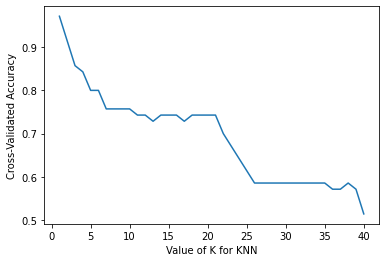

In [136]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xtrain,ytrain, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [137]:
# At k=1 we get 100 % Accuracy ,At k=2 we get 96% accuracy and At k=4 we get around 50% accuracy